<a href="https://colab.research.google.com/github/eldellobo/22E3/blob/main/Estadistica/Colab/ACA3/ACA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<center> <h2>ACA3</h2> </center>
<br>
<br>
<br>
<center>
<p>Presentado por:</p><br>


<p>Luis Miguel Arias Rodriguez</p>
<p>14467436</p><br>



<p>Presentado a:</p><br>

<p>Ing. Milton Hernando Buitrago Torres</p><br>



<p>Especialización en Analítica de Datos, ESP11</p><br>

<p>Corporación Unificada Nacional de Educación Superior, CUN</p><br>
<p>Octubre 12, 2022 </p><br>
</center>






---



<center><h2>Variables</h2></center>

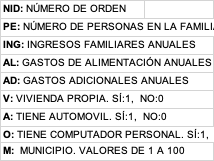



---



<center><h1>Fórmulas</h1></center>

<center><h2>P(A/B)</h2></center>

<center><h2>P(A o B) = P(A) + P(B) - P(A y B)</h2></center>

<center><h2>P(A y B) = P(A) * P(B|A)</h2></center>




---



<center><h2>Inicio Codigo</h2></center>

In [1]:
# Cargo las librerias necesarias
#--------------------------------------------------------------
# Manejo de Datos
import pandas as pd
import numpy as np
# Generador de gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Procesamiento y análisis
import statsmodels.api as sm
import math
from scipy import stats
from scipy.stats import pearsonr
# Configuracion para matplotlib
plt.style.use('ggplot')
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargo la sabana de datos
sabana = '/content/drive/MyDrive/Estadistica/ACA3/ACA3.xlsx'

In [3]:
# Creo un dataframe por cada estrato

df1 = pd.read_excel(sabana, sheet_name='ESTRATO1')
E1 = pd.DataFrame(df1)
df2 = pd.read_excel(sabana, sheet_name='ESTRATO2')
E2 = pd.DataFrame(df2)
df3 = pd.read_excel(sabana, sheet_name='ESTRATO3')
E3 = pd.DataFrame(df3)

In [4]:
# Valido el total de registros y variables
E1.info(), E2.info(), E3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NID     517 non-null    int64
 1   PE      517 non-null    int64
 2   ING     517 non-null    int64
 3   AL      517 non-null    int64
 4   AD      517 non-null    int64
 5   V       517 non-null    int64
 6   A       517 non-null    int64
 7   O       517 non-null    int64
 8   M       517 non-null    int64
dtypes: int64(9)
memory usage: 36.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   NID     633 non-null    int64
 1   PE      633 non-null    int64
 2   ING     633 non-null    int64
 3   AL      633 non-null    int64
 4   AD      633 non-null    int64
 5   V       633 non-null    int64
 6   A       633 non-null    int64
 7   O       633 non-null    int64
 8   M       633 n

(None, None, None)



---



<center><h3>Tableros para estratos |1 - 2 - 3|<h3></center>
<p> PE ( Numero de personas en la familia)  como index <br> 
V ( Vivienda propia | 1=Si | 0=No | <br>
A ( Tiene Automovil | 1=Si | 0=No | <br>
O ( Tiene computador | 1=Si | 0=No | <br> </p>


In [5]:
# Genero los tableros para los Estratos
# ESTRATO1
Ve1 = pd.crosstab(index = E1['PE'], columns=E1['V'], margins=True )
Ae1 = pd.crosstab(index = E1['PE'], columns=E1['A'], margins=True )
Oe1 = pd.crosstab(index = E1['PE'], columns=E1['O'], margins=True )
# ESTRATO2
Ve2 = pd.crosstab(index = E2['PE'], columns=E2['V'], margins=True )
Ae2 = pd.crosstab(index = E2['PE'], columns=E2['A'], margins=True )
Oe2 = pd.crosstab(index = E2['PE'], columns=E2['O'], margins=True )
# ESTRATO3
Ve3 = pd.crosstab(index = E3['PE'], columns=E3['V'], margins=True )
Ae3 = pd.crosstab(index = E3['PE'], columns=E3['A'], margins=True )
Oe3 = pd.crosstab(index = E3['PE'], columns=E3['O'], margins=True )

In [6]:
tablaE1 = pd.concat([Ve1, Ae1, Oe1], axis=1, sort= False)
tablaE2 = pd.concat([Ve2, Ae2, Oe2], axis=1, sort= False)
tablaE3 = pd.concat([Ve3, Ae3, Oe3], axis=1, sort= False)

In [7]:
print("ESTRATO 1")
print("PE | |   V   |    |   A   |    |   O   | ")
tablaE1

ESTRATO 1
PE | |   V   |    |   A   |    |   O   | 


,0,1,All,0,1,All,0,1,All
PE,,,,,,,,,
1,32,60,92,53,39,92,88,4,92
2,50,73,123,72,51,123,108,15,123
3,65,85,150,84,66,150,135,15,150
4,37,62,99,66,33,99,87,12,99
5,21,28,49,31,18,49,45,4,49
6,2,2,4,3,1,4,3,1,4
All,207,310,517,309,208,517,466,51,517


In [8]:
print("ESTRATO 2")
print("PE | |   V   |    |   A   |    |   O   | ")
tablaE2

ESTRATO 2
PE | |   V   |    |   A   |    |   O   | 


,0,1,All,0,1,All,0,1,All
PE,,,,,,,,,
1,44,74,118,58,60,118,110,8,118
2,57,118,175,111,64,175,151,24,175
3,64,98,162,105,57,162,144,18,162
4,45,80,125,80,45,125,111,14,125
5,17,29,46,28,18,46,44,2,46
6,2,5,7,5,2,7,6,1,7
All,229,404,633,387,246,633,566,67,633


In [9]:
print("ESTRATO 3")
print("PE | |   V   |    |   A   |    |   O   | ")
tablaE3

ESTRATO 3
PE | |   V   |    |   A   |    |   O   | 


,0,1,All,0,1,All,0,1,All
PE,,,,,,,,,
1,18,49,67,45,22,67,60,7,67
2,33,55,88,44,44,88,79,9,88
3,33,36,69,35,34,69,62,7,69
4,36,55,91,53,38,91,79,12,91
5,5,23,28,18,10,28,24,4,28
6,1,6,7,4,3,7,7,0,7
All,126,224,350,199,151,350,311,39,350




---



<center><h2>Preguntas</h2></center>



---



<center><h2>Condicionada</h2></center>

1. Que probabilidad hay que en una familia de 3 persona tengan computador en Estrato 1
2. Que probabilida hay que en una familia de 6 personas en el Estrato 2 tenga Casa propia
3. Que probabilidad hay que en el Estrato 3 una familia de 2 personas tengan Automovil
4. Sabiendo que tiene casa, Cual es la probabilidad de que una familia tenga 2 integrantes en Estrato 3

In [10]:
r1 = tablaE1.iloc[2,7] / tablaE1.iloc[2,8] 
r2 = tablaE2.iloc[5,1] / tablaE2.iloc[5,2] 
r3 = tablaE3.iloc[1,4] / tablaE3.iloc[1,5] 
r4 = tablaE3.iloc[1,1] / tablaE3.iloc[1,2]

In [11]:
print("La probabilidad de que una familia de 3 personas tenga computador en Estrato 1 es:",r1)
print("La probabilida que en una familia de 6 personas en el Estrato 2 tenga Casa propia es:",r2)
print("La probabilidad que en el Estrato 3 una familia de 2 personas tengan Automovil es:",r3)
print("Teniendo Casa, la probabilidad de que una familia tenga 2 integrantes en Estrato 3:",r4)

La probabilidad de que una familia de 3 personas tenga computador en Estrato 1 es: 0.1
La probabilida que en una familia de 6 personas en el Estrato 2 tenga Casa propia es: 0.7142857142857143
La probabilidad que en el Estrato 3 una familia de 2 personas tengan Automovil es: 0.5
Teniendo Casa, la probabilidad de que una familia tenga 2 integrantes en Estrato 3: 0.625




---



<center><h2>A o B</h2></center>


1.   En una familia de 5 personas en Estrato 2, cual es la probabilidad de que tenga Casa o Computador
2.   En Estrato 1 la familia de 6 personas cual es la probabilidad de que tenga Automovil o Casa
3. Una familia de 2 personas en Estrato 3, que probabilidad hay de que tengan Computador o Automovil



In [12]:
r1 = (((tablaE2.iloc[4,1] / tablaE2.iloc[4,2]) + (tablaE2.iloc[4,7] / tablaE2.iloc[4,8])) - (tablaE2.iloc[4,1] / tablaE2.iloc[6,7]))
r2 = (((tablaE1.iloc[5,4] / tablaE1.iloc[5,5]) + (tablaE1.iloc[5,1] / tablaE1.iloc[5,2])) - (tablaE1.iloc[5,4] / tablaE1.iloc[6,1])) 
r3 = (((tablaE3.iloc[1,7] / tablaE3.iloc[1,8]) + (tablaE3.iloc[1,4] / tablaE3.iloc[1,5])) - (tablaE3.iloc[1,7] / tablaE3.iloc[6,4]))

In [13]:
print("La familia de 5 personas en Estrato 2,la probabilidad de que tenga Casa o Computador es:",r1)
print("En Estrato 1 la familia de 6 personas la probabilidad de que tenga Automovil o Casa es:",r2)
print("Una familia de 2 personas en Estrato 3, la probabilidad de que tengan Computador o Automovil es:",r3)

La familia de 5 personas en Estrato 2,la probabilidad de que tenga Casa o Computador es: 0.2410772225827385
En Estrato 1 la familia de 6 personas la probabilidad de que tenga Automovil o Casa es: 0.7467741935483871
Una familia de 2 personas en Estrato 3, la probabilidad de que tengan Computador o Automovil es: 0.5426700782661048




---



<center><h2>A y B</h2></center>


1.   La probabilidad de que la familia de 4 integrantes en Estrato 1 tenga Computador y Casa 
2.  La probabilidad de que la familia de 6 integrantes en Estrato 2 tenga Casa y Automovil
3. La probabilidad de que la familia de 1 integrante en Estrato 3 tenga Automovil y Computador

In [14]:
r1 = tablaE1.iloc[3,7] / tablaE1.iloc[6,1]
r2 = tablaE2.iloc[5,1] / tablaE2.iloc[6,4]
r3 = tablaE3.iloc[0,4] / tablaE3.iloc[6,7]

In [15]:
print("La probabilidad de que una familia de 4 integrantes en Estrato 1 tenga Computador y Casa es:",r1)
print("La probabilidad de que una familia de 6 integrantes en Estrato 2 tenga Casa y Automovil es:",r2)
print("La probabilidad de que una familia de 1 integrante en Estrato 3 tenga Automovil y Computador es:",r3)

La probabilidad de que una familia de 4 integrantes en Estrato 1 tenga Computador y Casa es: 0.03870967741935484
La probabilidad de que una familia de 6 integrantes en Estrato 2 tenga Casa y Automovil es: 0.02032520325203252
La probabilidad de que una familia de 1 integrante en Estrato 3 tenga Automovil y Computador es: 0.5641025641025641
